In [13]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [14]:
catalog


{'patients': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('/Users/vihangamagarwal/code/century_health/century_health/ch/data/01_raw/patients.csv'), "
             "protocol='file', load_args={}, save_args={'index': False})",
 'encounters': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('/Users/vihangamagarwal/code/century_health/century_health/ch/data/01_raw/encounters.parquet'), "
               "protocol='file', load_args={}, save_args={})",
 'symptoms': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('/Users/vihangamagarwal/code/century_health/century_health/ch/data/01_raw/symptoms.csv'), "
             "protocol='file', load_args={}, save_args={'index': False})",
 'medications': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('/Users/vihangamagarwal/code/century_health/century_health/ch/data/01_raw/medications.csv'), "
                "protocol='file', load_args={}, save_args={'index': 

In [15]:
t_master_table = catalog.load("t_master_table")

[05/02/25 00:41:30] INFO     Loading data from t_master_table (SQLTableDataset)...              ]8;id=651270;file:///Users/vihangamagarwal/miniconda3/envs/ch_env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=658178;file:///Users/vihangamagarwal/miniconda3/envs/ch_env/lib/python3.10/site-packages/kedro/io/data_catalog.py#401\401]8;;\

In [16]:
t_master_table.shape

(121305, 69)

In [17]:
len(t_master_table["patient_id"].unique())

9800

In [18]:
t_patients = catalog.load("t_patients")

[05/02/25 00:41:32] INFO     Loading data from t_patients (SQLTableDataset)...                  ]8;id=774742;file:///Users/vihangamagarwal/miniconda3/envs/ch_env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=796149;file:///Users/vihangamagarwal/miniconda3/envs/ch_env/lib/python3.10/site-packages/kedro/io/data_catalog.py#401\401]8;;\

In [19]:
len(t_patients["patient_id"].unique())

10000

In [20]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
data = t_master_table

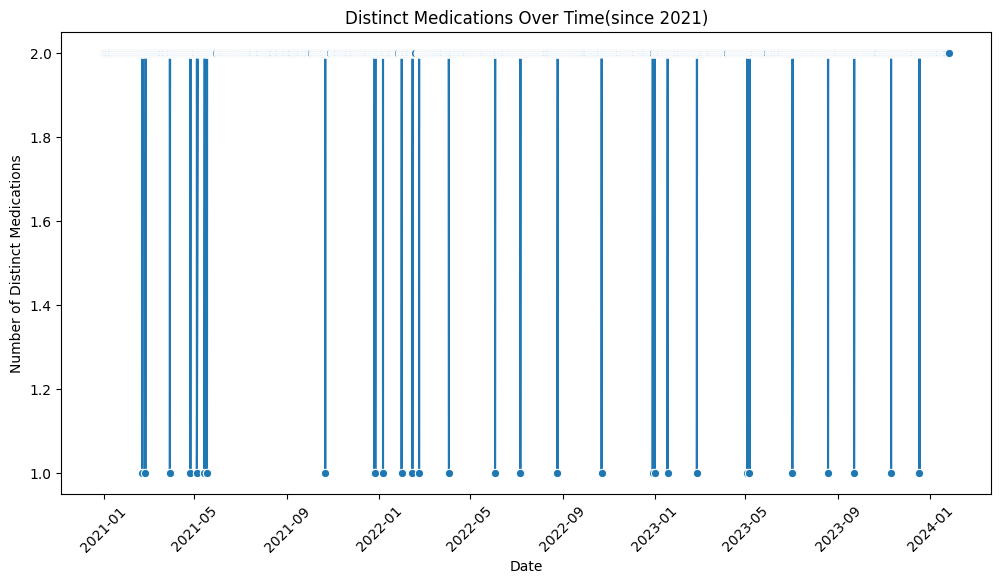

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(12, 6))
if "medication_id" in data.columns and "start" in data.columns:
    data["date"] = pd.to_datetime(data["start"])  # Convert to datetime

    data_2024 = data[data["start"].dt.year.isin([2021, 2022, 2023, 2024])]
    med_counts = data_2024.groupby("start")["medication_id"].nunique()

    sns.lineplot(x=med_counts.index, y=med_counts.values, marker="o")
    plt.xlabel("Date")
    plt.ylabel("Number of Distinct Medications")
    plt.title("Distinct Medications Over Time(since 2021)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("MEDICATIONS or DATE column missing. Skipping plot.")


In [24]:
data["start"] = pd.to_datetime(data["start"])
min_date = data["start"].min()
max_date = data["start"].max()

print("Min date:", min_date)
print("Max date:", max_date)

Min date: 1947-03-20 19:09:24+00:00
Max date: 2024-01-25 20:06:35+00:00


In [23]:
symptom_cols = ["rash", "joint_pain", "fatigue", "fever"]

if all(col in data.columns for col in symptom_cols):
    severe_cases = data[(data[symptom_cols] >= 30).all(axis=1)]
    percentage = (len(severe_cases) / len(data)) * 100
    print(f"Percentage of patients with all symptoms ≥ 30: {percentage:.2f}%")
else:
    print("Some symptom columns are missing.")

Percentage of patients with all symptoms ≥ 30: 0.00%
